In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
df = pd.read_csv('../03-Classification/bank+marketing/bank/bank-full.csv', sep=';')
features = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']
df = df[features]

In [40]:
from sklearn.model_selection import train_test_split

df_full_train , df_test = train_test_split(df,test_size=0.2,random_state=1)
df_train , df_val = train_test_split(df_full_train, test_size=0.25,random_state=1) 


df_train.reset_index(drop=True,inplace=True)
df_val.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

y_train = df_train['y'].values == 'yes'
y_val = df_val['y'].values == 'yes'
y_test = df_test['y'].values == 'yes'

del df_train['y']
del df_val['y']
del df_test['y']



In [41]:
numerical = list(df_train.dtypes[df_train.dtypes != 'object'].index)
categorical = list(df_train.dtypes[df_train.dtypes == 'object'].index)
categorical

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
for num in numerical:
    auc_score = roc_auc_score(y_train, df_train[num])
    if auc_score < 0.5 :
        auc_score = roc_auc_score(y_train, -df_train[num])
    print('%16s : %3f' % (num, auc_score))
    

             age : 0.512186
         balance : 0.588831
             day : 0.525958
        duration : 0.814700
        campaign : 0.571454
           pdays : 0.590128
        previous : 0.598565


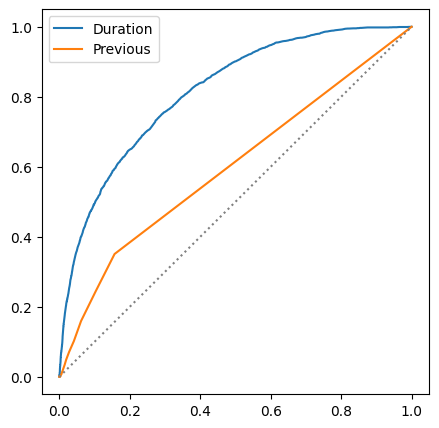

In [43]:
plt.figure(figsize=(5,5))

fpr,tpr,_ = roc_curve(y_train, df_train['duration'])
plt.plot(fpr,tpr, label = 'Duration')

fpr,tpr,_ = roc_curve(y_train, df_train['previous'])
plt.plot(fpr,tpr, label = 'Previous')
plt.plot([0,1], [0,1], color = 'grey',linestyle = ':')

plt.legend()
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

model = LogisticRegression(solver='liblinear' , C = 0.1, max_iter=1000)

train_dicts = df_train[numerical+categorical].to_dict(orient = 'records')
val_dicts =  df_val[numerical+categorical].to_dict(orient = 'records')
test_dicts =  df_test[numerical+categorical].to_dict(orient = 'records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

model.fit(X_train,y_train)

pred = model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, pred)

np.float64(0.9006549947996633)

In [45]:
actual_positives = y_val == True
actual_negatives = y_val == False

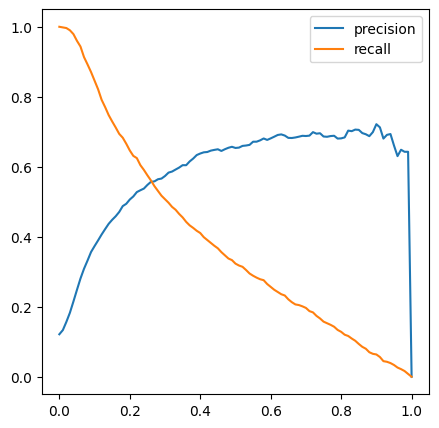

In [55]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support,precision_score,recall_score


thresholds =  np.linspace(0,1,101)

precisions = []
recalls = []

for threshold in thresholds:
    predict_positive = (pred >= threshold)
    predict_negative = (pred < threshold)

    tp = (actual_positives & predict_positive).sum()
    tn = (actual_negatives & predict_negative).sum()

    fp = (actual_negatives & predict_positive).sum()
    fn = (actual_positives & predict_negative).sum()

    precision = precision_score(y_val,pred >= threshold, zero_division=0)
    recall = recall_score(y_val,pred >= threshold, zero_division=0)
    precisions.append(precision)
    recalls.append(recall)


plt.figure(figsize=(5,5))
plt.plot(thresholds, precisions, label = "precision")
plt.plot(thresholds, recalls, label = "recall")
plt.legend()
plt.show()


In [50]:
df_scores

,threshold,tp,fp,fn,tn,p,r
0,0.00,1098,7944,0,0,0.121433,1.000000
1,0.01,1096,7118,2,826,0.133431,0.998179
2,0.02,1094,5876,4,2068,0.156958,0.996357
3,0.03,1087,4854,11,3090,0.182966,0.989982
4,0.04,1075,3923,23,4021,0.215086,0.979053
...,...,...,...,...,...,...,...
96,0.96,29,17,1069,7927,0.630435,0.026412
97,0.97,24,13,1074,7931,0.648649,0.021858
98,0.98,18,10,1080,7934,0.642857,0.016393
99,0.99,9,5,1089,7939,0.642857,0.008197
